# time series
time series is supervised machine learning algorithm. time series is use for forecasting where we predict data with respect to time. ex. seconed, minute, hourse, month, year we use it for stock price forecasting, wheateher forecasting and sales forecasting

## types of time series :-
* 1. treand
  2. seasonal
  3. cyclic pattern
  4. random/white noice pattern

## 1. treand
* when the data show a long term increase or decrease over time is called treand
* x increase y increase-> up treand
* x decrease y increase-> down treand

## 2. seasonality
* type of time series is when data show regular pattern or change at certain time, like every day, month, year, ex, retail sales, go up during holiday season every year

## 3. cyclic pattern
* cyclic pattern is when data goes up and down in repeating way, but time between change is not always same

## 4. random/white noise model
* a series purly random in nature is called as white noise .
* mean=0, constant variable, and uncolrelated
* average is the best forecast of this series.
* Mean = 0 → the average value is 0

* Variance is constant → values don’t get bigger or smaller over time

* Uncorrelated → each value is independent; past values don’t help predict the future

# algorithm
* 1. auto regression: 
* auto regression model is a time series model that uses past value to predict furure ones.
* it takes the value from previous time step.
* then it uses regression equation. like=y=mx+c to predict the next value

* 2. moving average
* moving average algorithm is one of the time series algorithm which is work on average of the data.

* 3. ARMA model
* it is combination of auto regression and moving average.

## stationary of time series
* in time series auto regression, moving average and ARMA algorithm work well only when the data is stationary if it is not covariance are same
* a series which is not stationary is called as integeres of order 1 and denoted by(1).

## how to find stationary or no
#### auto correlation
* auto correlation help to wheather data is stationary or no.nauto correlation measure degree of freedom between observation and it is lag.
* ACF- auto correlation factor plot

### hypothises test - Adfaller 
* a statistic significante test(is used to check if a time series is stationary) where test statistic(it calculate a value is called) and p-value is taken to check if the series is stationary or no.
* if p_value>0.5, it is  not stationary and if p_value<0.5, it is stationary

* 4. ARIMA model
* ARIMA: ARIMA is a combination of auto regression integreted order moging average
* ARIMA: (p,d,q)>>>(0,0,1)>> only ma will apply
* (1,2,1)-> 1 time AR, 2 time differencing and 1 time MA will apply

ARIMA (AutoRegressive Integrated Moving Average)

ARIMA is a classical statistical model used for time series forecasting, especially when the data is non-stationary (trend or varying mean over time).

It combines three parts: AR + I + MA.

1️⃣ Components of ARIMA
1.1 AR – AutoRegressive (p)

Uses past values of the series to predict the future.

p = number of lag observations included.

Formula:

𝑋𝑡=𝑐+𝜙1𝑋𝑡−1+𝜙2𝑋𝑡−2+⋯+𝜙𝑝𝑋𝑡−𝑝+𝜖Xt

When to use AR:

Data is stationary (mean & variance constant)

There is correlation between current value and past values

Example:

If p=2, forecast depends on last 2 observations.

1.2 I – Integrated (d)

Differencing the series to make it stationary.

d = number of times the data is differenced.

𝑌𝑡=𝑋𝑡−𝑋𝑡−1(first difference)

If d=1, subtract previous value once.

If d=2, subtract twice (difference of differences).

Why differencing?

Many time series have trends (non-stationary)

AR and MA need stationary data to work properly

When to use d:

If Augmented Dickey-Fuller (ADF) test shows non-stationary → apply differencing

1.3 MA – Moving Average (q)

Uses past forecast errors to predict the future.

q = number of lagged forecast errors included

Formula:

Xt​=μ+ϵt​+θ1​ϵt−1​+⋯+θq​ϵt−q​

When to use MA:

Captures short-term shocks or noise patterns

Works well when residual errors are correlated

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = {
    "Month": pd.date_range(start="2022-01", periods=24, freq="M"),
    "Sales": [120,130,125,140,150,160,155,165,170,180,175,190,
              200,210,205,220,230,240,235,245,250,260,255,270]
}

df = pd.DataFrame(data)
df.set_index("Month", inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_6676\788124202.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  "Month": pd.date_range(start="2022-01", periods=24, freq="M"),


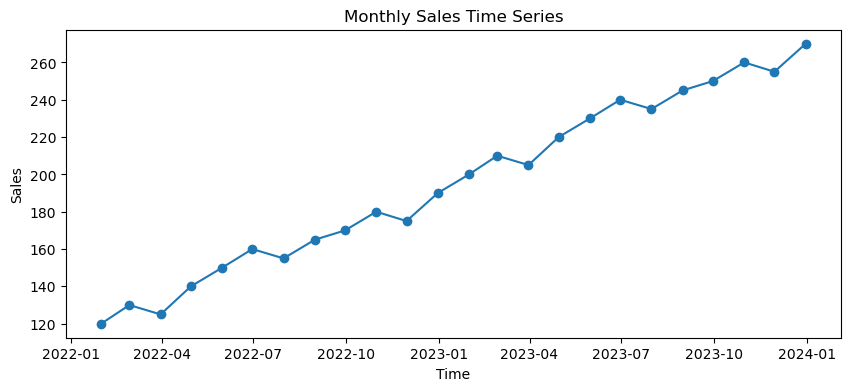

In [4]:
plt.figure(figsize=(10,4))
plt.plot(df["Sales"], marker='o')
plt.title("Monthly Sales Time Series")
plt.xlabel("Time")
plt.ylabel("Sales")
plt.show()

In [5]:
from statsmodels.tsa.stattools import adfuller  # This code checks whether your sales data is stationary or not, Runs the Augmented Dickey-Fuller (ADF) test,Checks if the series has a unit root → whether it is non-stationary or stationary

result = adfuller(df["Sales"])  
print("ADF Statistic:", result[0])  # p-value > 0.05-NOT stationary (it has a trend), data has trend or seasonality
print("p-value:", result[1])  # p-value ≤ 0.05-IS stationary, mean and variance are constant

ADF Statistic: 0.060592890258430225
p-value: 0.9632652906954908


In [6]:
df["Sales_diff"] = df["Sales"] - df["Sales"].shift(1)  # df["Sales"].shift(1) → moves the series down by 1 row (previous month), Sales - Sales.shift(1) → calculates difference between current and previous month
df.dropna(inplace=True)

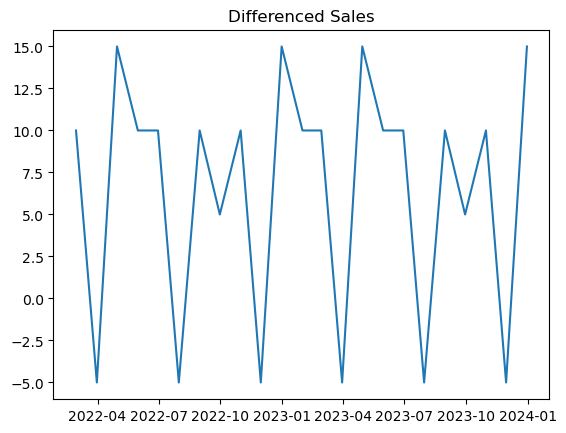

In [7]:
plt.plot(df["Sales_diff"])
plt.title("Differenced Sales")
plt.show()

In [8]:
#Y(t) - Y(t-1)

In [12]:
train_size = int(len(df) * 0.8)
train = df["Sales"][:train_size]  # First 80% of rows → used to fit the model
test = df["Sales"][train_size:]  # Remaining 20% → used to evaluate the forecast

In [13]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(train, order=(1,1,1))
model_fit = model.fit()

C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


In [14]:
forecast = model_fit.forecast(steps=len(test))  # model.fitIt has learned the pattern from the training data, forecasPredicts future values for a specified number of steps

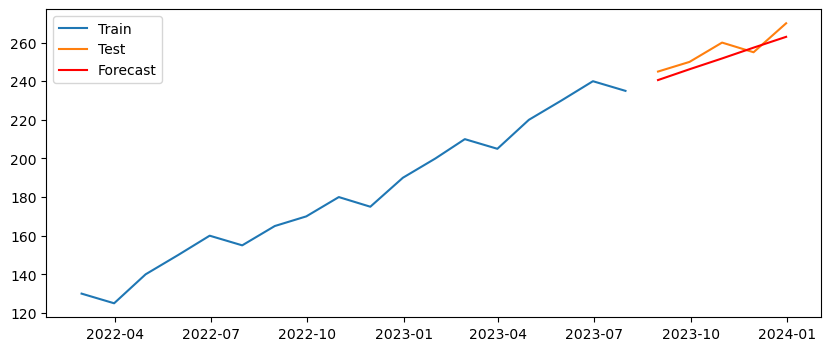

In [15]:
plt.figure(figsize=(10,4))
plt.plot(train, label="Train")
plt.plot(test, label="Test")
plt.plot(test.index, forecast, label="Forecast", color="red")
plt.legend()
plt.show()

In [16]:
from sklearn.metrics import mean_absolute_error, r2_score

mae = mean_absolute_error(test, forecast)
print("MAE:", mae)

MAE: 5.166555698386992


In [17]:
r2=r2_score(test, forecast)
print(r2)

0.5773439748691261
